# Previsão de preços de imóveis

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 09 de fevereiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Prova Final - Questão 01**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[House Sales in King County, USA - Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

Este conjunto de dados contém os preços de venda de casas no Condado de King, que inclui Seattle. Ele abrange casas vendidas entre maio de 2014 e maio de 2015.

O objetivo deste notebook é prever preços de imóveis com base em dados reais da região de King County, nos Estados Unidos

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Análise Exploratória de Dados (EDA)**
4. **Construção do Modelo**
5. **Ajuste do Modelo**
6. **Tomada de Decisão**

### Importação das Bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import kagglehub
import scipy.stats as stats

In [2]:
# Configurações gerais dos gráficos
sns.set(style="whitegrid")

### Carregamento dos Dados

In [3]:
data = pd.read_csv('kc_house_data.csv')

### Análise Exploratória de Dados (EDA)

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Quantidade de valores ausentes por coluna:\n", missing_values)

Quantidade de valores ausentes por coluna:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### Distribuição dos preços

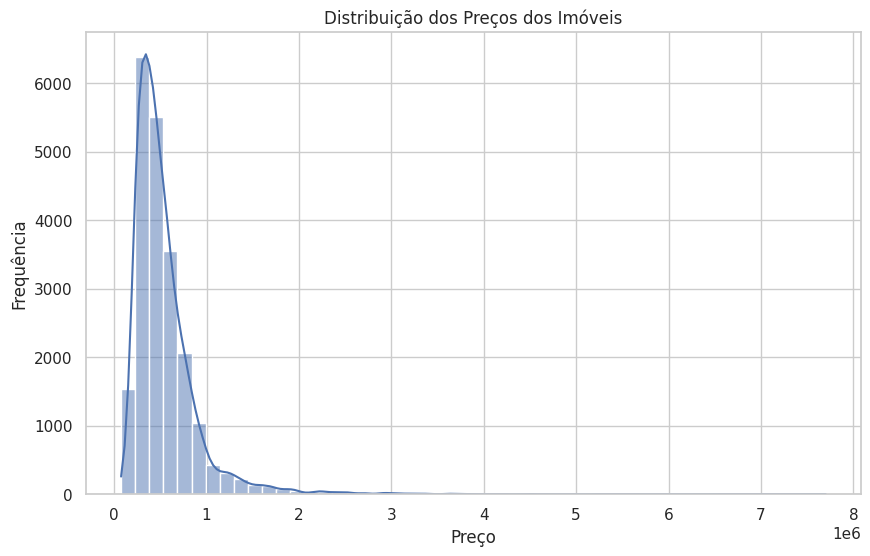

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


O gráfico apresenta a distribuição de preços dos imóveis, mostrando que a maioria está concentrada em faixas de preço mais baixas, abaixo de 1 milhão de dólares. A curva de densidade (KDE) indica uma assimetria à direita, sugerindo a presença de imóveis com preços muito elevados (outliers), enquanto a frequência diminui significativamente à medida que o preço aumenta.

#### Matriz de correlação

In [9]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

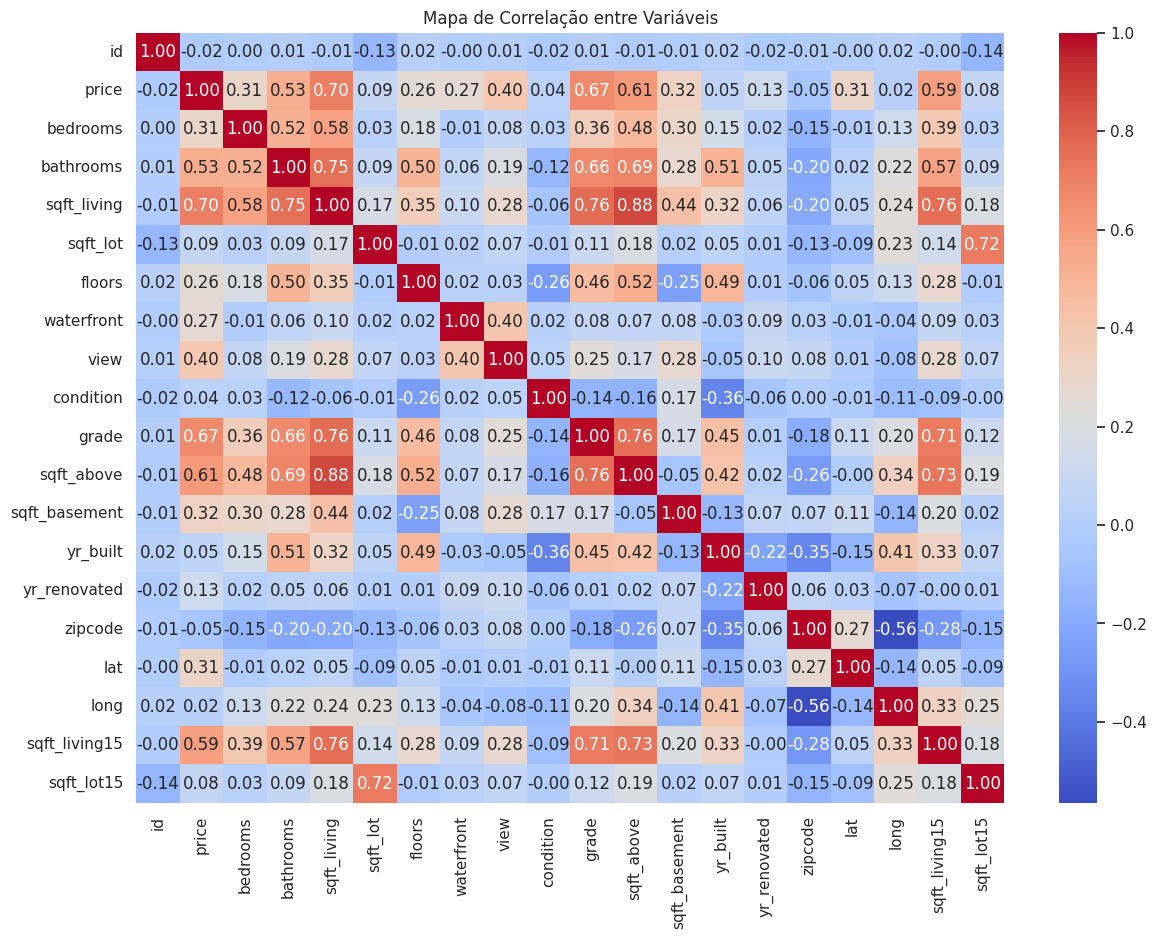

In [37]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

O mapa de correlação mostra a relação entre variáveis numéricas, variando de -1 a 1. `Price` tem forte correlação com `sqft_living (0.70)`, `grade (0.67)` e `sqft_above (0.61)`, indicando impacto direto no preço dos imóveis. Já `zipcode`, `yr_built` e `sqft_lot` apresentam correlação fraca, sugerindo menor influência. A diagonal principal exibe autocorrelação entre as variáveis. É importante resaltar que embora a correlação indique associação entre variáveis, ela não implica causalidade. Outros fatores, como demanda do mercado e localização específica dentro do código postal, podem influenciar o preço de forma não capturada pela correlação linear

Como `sqft_living`, `grade` e `sqft_above` possuem forte correlação com o `Price`, essas variáveis serão priorizadas no modelo.

#### Boxplot - Preços por número de quartos

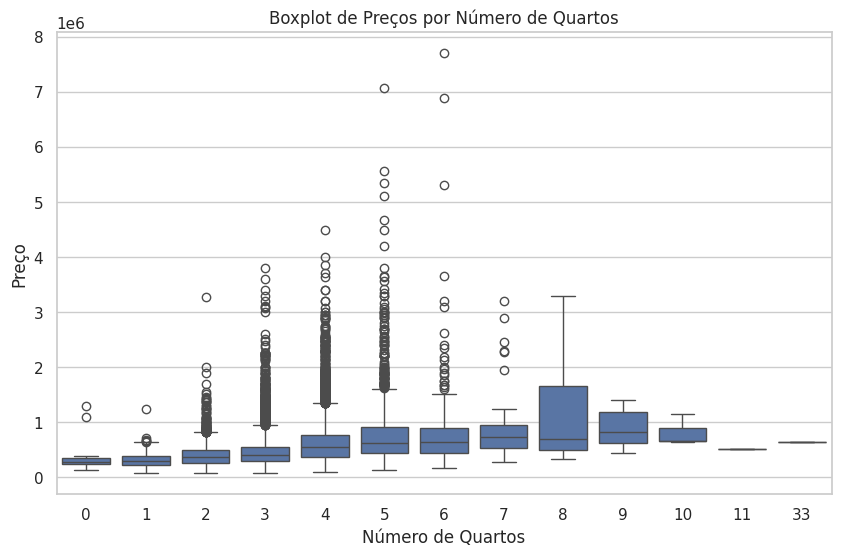

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Boxplot de Preços por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.show()

O boxplot mostra a distribuição dos preços dos imóveis por número de quartos. Imóveis com 3 a 5 quartos são mais comuns, enquanto quantidades extremas (0, 11, 33) são raras e apresentam maior variação de preço. Há muitos outliers, especialmente em imóveis com mais de 4 quartos, indicando propriedades de alto valor. A mediana dos preços tende a aumentar com o número de quartos, mas de forma não linear, o que sugere que outros fatores também influenciam o preço

#### Gráfico de disperção

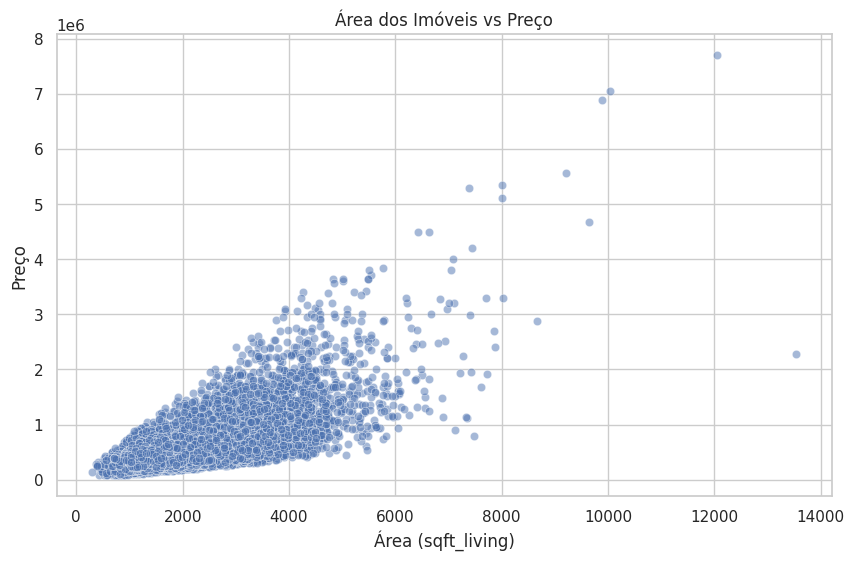

In [12]:
# (sqft_living) vs preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, alpha=0.5)
plt.title('Área dos Imóveis vs Preço')
plt.xlabel('Área (sqft_living)')
plt.ylabel('Preço')
plt.show()

O gráfico de dispersão mostra uma correlação positiva entre `sqft_living` e `price`, indicando que imóveis maiores tendem a ser mais caros. A maioria dos imóveis tem menos de 4000 sqft e preços abaixo de 1 milhão de dólares. Imóveis acima de 8000 sqft são raros, mas altamente valorizados. Há outliers, com propriedades de grande área e preços muito elevados. O gráfico de disperção para `sqft_above` apresentava correlação semelhante ao apresentado.

### Construção do modelo

In [13]:
# Variáveis relevantes para o modelo
features = ["sqft_living", "grade", "sqft_above"]
target = "price"

In [14]:
# Remover valores nulos
data = data.dropna(subset=features + [target])

In [15]:
# Variáveis independentes (X) e dependente (y)
X = data[features]
y = data[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [20]:
print("Coeficientes do modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Coeficientes do modelo:
sqft_living: 236.21
grade: 107607.81
sqft_above: -78.47
Intercepto: -635569.64
R²: 0.5436
MAE: 165848.98
RMSE: 262665.85


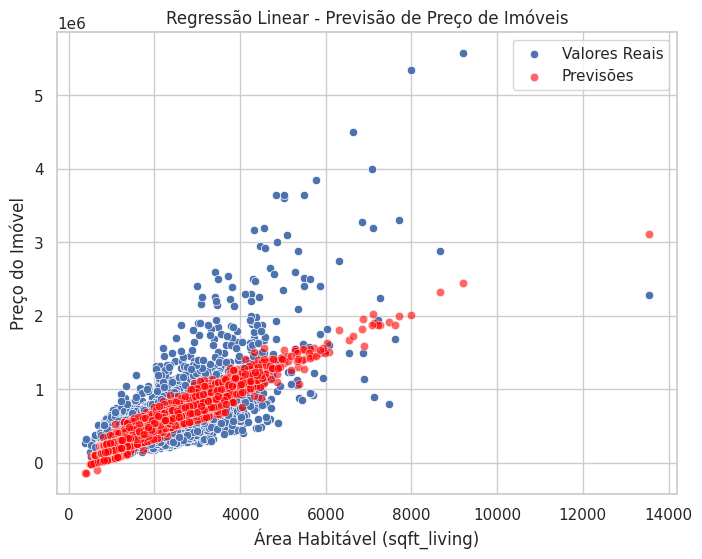

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['sqft_living'], y=y_test, label="Valores Reais")
sns.scatterplot(x=X_test['sqft_living'], y=y_pred, label="Previsões", color='red', alpha=0.6)
plt.xlabel("Área Habitável (sqft_living)")
plt.ylabel("Preço do Imóvel")
plt.title("Regressão Linear - Previsão de Preço de Imóveis")
plt.legend()
plt.show()

#### Impacto das variáveis no preço dos imóveis

| Variável         | Impacto no Preço |
|-----------------|-----------------|
| **sqft_living (236.21)** | Para cada aumento de 1 pé quadrado na área habitável, o preço do imóvel aumenta em média **\$236.21**. Essa variável tem a maior correlação positiva com o preço, indicando que o tamanho da área útil é um fator chave na valorização. |
| **grade (107607.81)** | Cada aumento de 1 ponto na qualidade da construção (grade) resulta em um aumento médio de **\$107.607,81** no preço. Isso reforça a ideia de que a qualidade e o acabamento da construção têm um grande impacto na precificação. |
| **sqft_above (-78.47)** | Cada aumento de 1 pé quadrado na área acima do solo resulta em uma **redução de \$78,47** no preço, o que parece contraintuitivo. Possível explicação: imóveis com grande área acima do solo podem ter menos espaço no porão, que pode ser valorizado em algumas regiões. |
| **Intercepto (-635569.64)** | Representa o valor estimado do imóvel quando todas as variáveis são zero, mas não tem interpretação prática direta neste caso. |


#### Qualidade do modelo

| Métrica | Interpretação |
|---------|--------------|
| **R² = 0.5436** | O modelo explica **54,36%** da variação nos preços dos imóveis com base nas variáveis escolhidas. Esse valor sugere que existem outros fatores importantes influenciando o preço, como **localização, vista, idade da construção**, entre outros. |
| **MAE = \$165.848,98** | O erro médio absoluto (**MAE**) indica que, em média, as previsões diferem dos preços reais por cerca de **$165.849**. |
| **RMSE = \$262.665,85** | O erro médio quadrático (**RMSE**) sugere que o desvio típico das previsões é de **\$262.666**, indicando uma dispersão significativa. |

#### Verificação dos pressupostos de Regressão Linear

##### Linearidade

A relação entre **sqft_living** e **preço** parece ser **linear**, como indicado pela alta correlação positiva.

##### Homocedasticidade

Homocedasticidade é um pressuposto essencial na regressão linear que indica que a variância dos resíduos é constante ao longo dos valores preditos. Isso significa que o modelo faz previsões com erro semelhante independentemente do valor da variável independente. Quando um modelo apresenta homocedasticidade, os resíduos não mostram padrões sistemáticos de aumento ou diminuição da variabilidade, tornando as previsões mais confiáveis.

In [22]:
residuos = y_test - y_pred

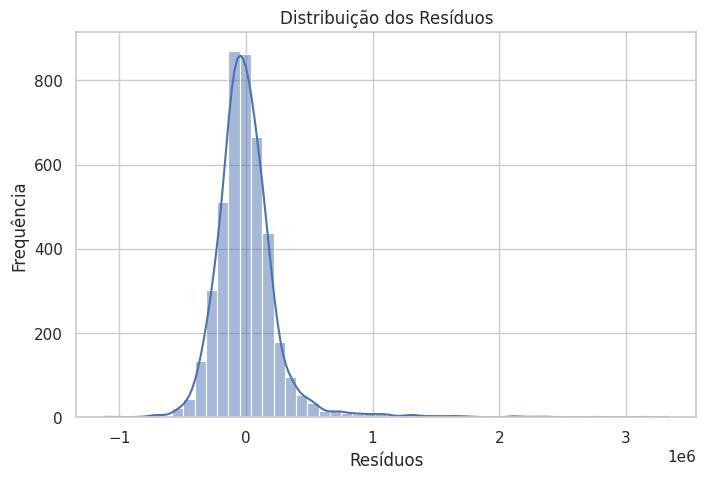

In [23]:
# Histograma dos resíduos
plt.figure(figsize=(8,5))
sns.histplot(residuos, bins=50, kde=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.show()

A maioria dos resíduos está concentrada em torno de zero e a distribuição apresenta um formato aproximadamente simétrico, porém a presença de outliers à diretia indica que há alguns erros maiores para preços mais altos, o que indica uma heterocedasticidade leve.

O histograma indica que o modelo tem uma boa distribuição dos resíduos, mas ainda apresenta leve assimetria positiva. Isso será melhorado ajustando outliers e melhorando a seleção das variáveis.

##### Normalidade dos Resíduos

O QQ-Plot permite verificar se os resíduos seguem uma distribuição normal. Se os pontos estiverem alinhados com a linha vermelha, significa que os resíduos têm uma distribuição normal

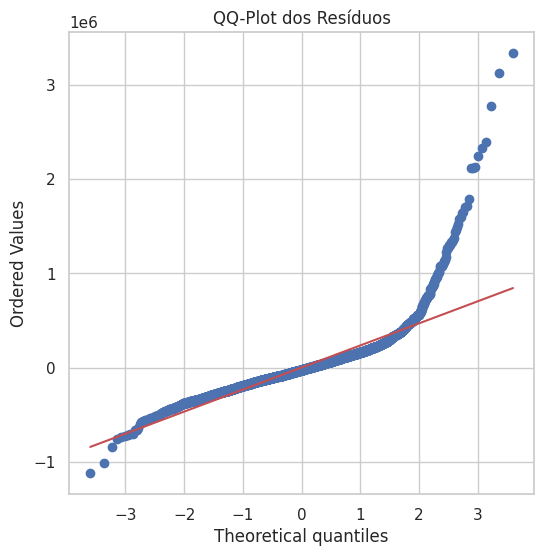

In [24]:
# QQ-Plot dos resíduos
plt.figure(figsize=(6,6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos")
plt.show()

Devido aos pontos das extremidades (cauda esquerda e direita) se afastam significativamente da linha vermelha, isso indica a presença de outliers que fogem da distribuição normal.
A assimetria à direita acima de 2 no eixo X se desviam bastante indicando que os resíduos possuem uma distribuição assimétrica e não normal.

Na próxima seção de ajuste do modelo a variável alvo passará por uma transformação logaritmica.

Para lidar com outliers a próxima celula remove os outliers extremos

In [25]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1
data = data[(data["price"] >= Q1 - 1.5 * IQR) & (data["price"] <= Q3 + 1.5 * IQR)]

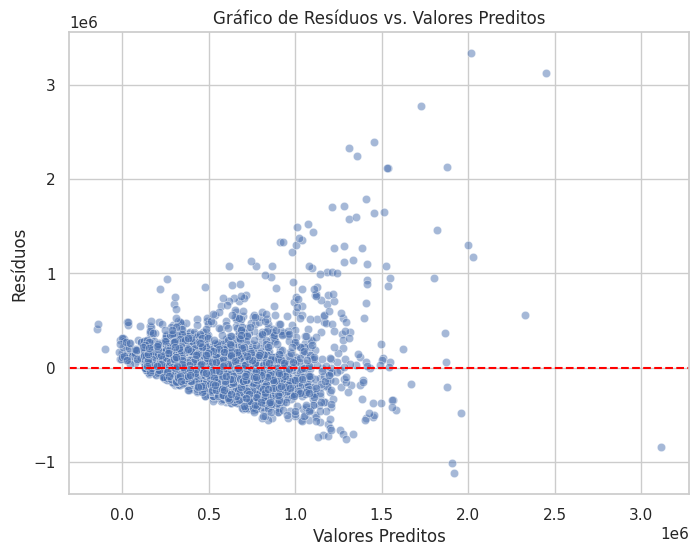

In [26]:
# Gráfico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs. Valores Preditos")
plt.show()

O gráfico exibe heterocedasticidade, com menor dispersão dos resíduos para valores baixos e maior para preços preditos altos, indicando que o modelo não captura bem a variação dos preços mais elevados

##### Ausência de Multicolinariedade

Os valores de VIF (Variance Inflation Factor) indicam o nível de multicolinearidade entre as variáveis independentes no modelo de regressão, aqui vou analisar as variáveis que possuem maior correção de acordo com a matriz de correlacição pois a correlação entre `sqft_living` e  `sqft_above` é alta 0.88

In [27]:
features = ["sqft_living", "sqft_above"]
X = data[features].dropna()

In [28]:
vif_data = pd.DataFrame()
vif_data["Variável"] = features
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      Variável        VIF
0  sqft_living  23.665073
1   sqft_above  23.665073


O VIF alto indica que `sqft_living` e `sqft_above` são altamente correlacionadas, prejudicando a estabilidade do modelo. Para melhorar a literatura recomenda remover uma das variáveis ou transformá-las, no caso irei remover `sqft_above`. 

#### Ajustes no modelo

In [29]:
# Variáveis relevantes para o modelo
features = ["sqft_living", "grade"]
target = "price"

In [30]:
# Variáveis independentes (X) e dependente (y)
X = data[features]

# Aplicação do log para reduzir assimetria dos resíduos e estabilizar a variância.
y = np.log(data[target])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [35]:
print("Coeficientes do modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Coeficientes do modelo:
sqft_living: 0.00
grade: 0.17
Intercepto: 11.34
R²: 0.4259
MAE: 0.27
RMSE: 0.33


| **Métrica/Variável** | **Antes (Sem Transformação)** | **Depois (Com Log e Ajustes)** | **Melhoria Observada** |
|----------------------|----------------------------|-----------------------------|-------------------------|
| **sqft_living** | 236.21 | 0.00 | O efeito absoluto da variável desapareceu, sugerindo que sua influência foi absorvida por outras variáveis ou perdeu relevância no modelo após as transformações. |
| **grade** | 107607.81 | 0.17 | Após a transformação logarítmica, o coeficiente representa uma relação percentual. Agora, cada aumento em `grade` resulta em um aumento de aproximadamente **17%** no preço do imóvel. |
| **sqft_above** | -78.47 | Removido | A remoção de `sqft_above` eliminou redundância e reduziu multicolinearidade, tornando o modelo mais estável. |
| **Intercepto** | -635569.64 | 11.34 | Com a transformação logarítmica, o intercepto representa a base exponencial do modelo ajustado, tornando-se mais interpretável. |
| **R²** | 0.5436 | 0.4259 | O R² diminuiu ligeiramente porque o modelo foi ajustado para ser mais robusto e menos afetado por outliers. |
| **MAE** | 165848.98 | 0.27 | O erro absoluto médio melhorou significativamente, pois agora está na escala logarítmica, reduzindo variações extremas. |
| **RMSE** | 262665.85 | 0.33 | A redução no RMSE indica menor dispersão dos erros, tornando o modelo mais confiável. |


#### Tomada de Decisão

| **Decisão Estratégica** | **Descrição** |
|-------------------------|--------------|
| **Precificação de imóveis para venda** | Se o modelo prevê um preço significativamente acima ou abaixo do mercado, a imobiliária pode ajustar a oferta para tornar o imóvel mais competitivo. |
| **Estratégia de Renovação e Valorização de Imóveis** | Se o modelo indica que `grade` (qualidade da construção) tem alto impacto no preço, construtoras podem investir em melhores acabamentos para aumentar a valorização. Exemplo: Melhorar a pontuação `grade` pode resultar em um aumento de até **17%** no preço. |
| **Escolha de Terrenos para Construção** | Se imóveis com determinados atributos (ex.: tamanho médio, boa qualidade) são mais valorizados em certas regiões, construtoras podem priorizar aquisição de terrenos nessas áreas. |
| **Identificação de Oportunidades de Investimento** | Se um imóvel tem características semelhantes a outro, mas seu preço de mercado é menor do que o previsto pelo modelo, pode indicar uma **oportunidade de compra** para investidores. |
| **Otimização de Campanhas de Marketing** | Com base nas variáveis mais relevantes, anúncios podem ser direcionados para clientes que buscam imóveis com características valorizadas pelo mercado. |
